
# Parkinsons Data Project
Lucas Van ~ Gaberela Lopez

In this program, we will look at a data set that was provided by Athanasios Tsanas and Max Little of the University of Oxford. Who collaborated with 10 medical centers and with Intel Corporation.

The data set can be found at the following location: https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring

The data is an ASCII CSV format.With the following attributes:

subject# - Integer that uniquely identifies each subject<br>
age - Subject age <br>
sex - Subject gender '0' - male, '1' - female <br>
test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment. <br>
motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated <br>
total_UPDRS - Clinician's total UPDRS score, linearly interpolated <br>
Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency<br> 
Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude <br>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice <br>
RPDE - A nonlinear dynamical complexity measure <br>
DFA - Signal fractal scaling exponent <br>
PPE - A nonlinear measure of fundamental frequency variation 
<br>

## References
Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009), 
'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests', 
IEEE Transactions on Biomedical Engineering (to appear). 

Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022 

Wooten, G F, et al. “Are men at greater risk for Parkinson's disease than women?” Journal of Neurology, Neurosurgery & Psychiatry, BMJ Publishing Group Ltd, 1 Apr. 2004

In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

names = ['subject#','age','sex','test_time','motor_UPDRS','total_UPDRS',
         'Jitter(%)','Jitter(Abs)','Jitter:RAP','Jitter:PPQ5','Jitter:DDP','Shimmer',
         'Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA,NHR',
         'HNR','RPDE','DFA','PPE']
df = pd.read_csv('parkinsons_updrs.data',header=0,sep=',') 
df.head(6)



,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500


## Motor UPDRS vs Age vs Gender

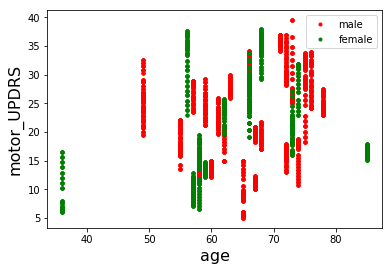

In [27]:
#Plot Age and sex

yraw = np.array(df['sex'])
MALE = 0    
FEMALE = 1   
y = (yraw == FEMALE).astype(int)
Imal = (y==0)
Ifem = (y==1)

xnames =['age','motor_UPDRS'] 
X = np.array(df[xnames])

plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Ifem,0],X[Ifem,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.legend(['male','female'],loc='upper right')

#plt.plot(df['age'],df['motor_UPDRS'],'o',)
plt.show()

We have more data on males. It has been suggested by many studies that there is a higher incidence rate of Parkinson among men. Possible reasons for this increased risk of Parkinson’s disease in men are toxicant exposure, head trauma, neuroprotection by oestrogen, mitochondrial dysfunction, or genetic risk factors.

## Covariance and Rsq

In [28]:
df = shuffle(df) #Randomize the rows.
x = df
y = np.array(x['motor_UPDRS'])
nsamp,natt = x.shape

ym = np.mean(y)
syy = np.mean((y-ym)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)

for k in range(natt):
    if not(k < 6):
        xm = np.mean(x.values[:,k])
        sxy = np.mean((x.values[:,k]-xm)*(y-ym))
        sxx = np.mean((x.values[:,k]-xm)**2)
        beta1[k] = sxy/sxx
        beta0[k] = ym - beta1[k]*xm
        Rsq[k] = (sxy)**2/sxx/syy
        #print(names[k])
        colName = df.columns[k]
        print("{0:15}  Rsq={1:f}".format(colName,Rsq[k]))

Jitter(%)        Rsq=0.007194
Jitter(Abs)      Rsq=0.002591
Jitter:RAP       Rsq=0.005283
Jitter:PPQ5      Rsq=0.005820
Jitter:DDP       Rsq=0.005285
Shimmer          Rsq=0.010475
Shimmer(dB)      Rsq=0.012117
Shimmer:APQ3     Rsq=0.007100
Shimmer:APQ5     Rsq=0.008483
Shimmer:APQ11    Rsq=0.018649
Shimmer:DDA      Rsq=0.007100
NHR              Rsq=0.005620
HNR              Rsq=0.024658
RPDE             Rsq=0.016540
DFA              Rsq=0.013512
PPE              Rsq=0.026384


PPE had the highest Rsq against motor UPDRS. PPE stands for a nonlinear measure of fundamental frequency variation.This means that this attribute has the strongest correlation with motor UPDRS. Much to our dismay, Our Rsq values are very low. 

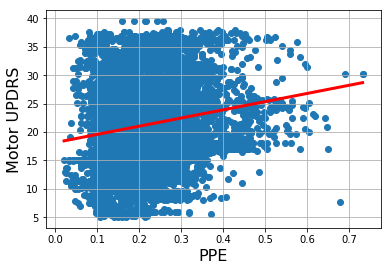

In [29]:
imax = np.argmax(Rsq)

xmin = np.min(x.values[:,imax])
xmax = np.max(x.values[:,imax])
ymin = beta0[imax] + beta1[imax]*xmin
ymax = beta0[imax] + beta1[imax]*xmax
plt.plot([xmin,xmax], [ymin,ymax], 'r-', linewidth=3)
plt.xlabel("PPE", fontsize=16)
plt.ylabel("Motor UPDRS", fontsize=16)
plt.scatter(x.values[:,imax],y)
plt.grid()
plt.show()

## Plots of all attributes against motor UPDRS

test_time


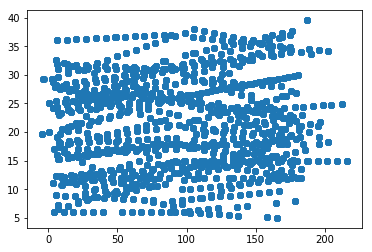

total_UPDRS


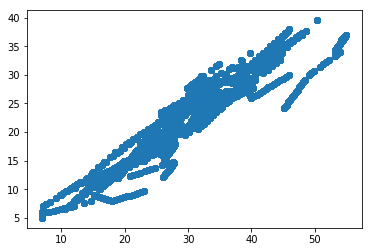

Jitter(%)


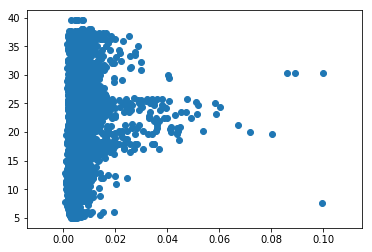

Jitter(Abs)


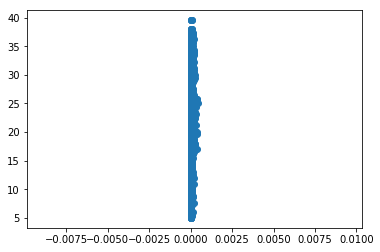

Jitter:RAP


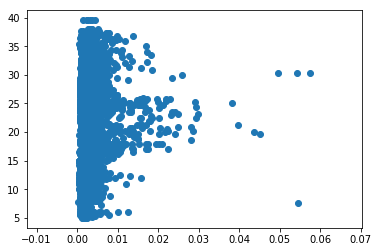

Jitter:PPQ5


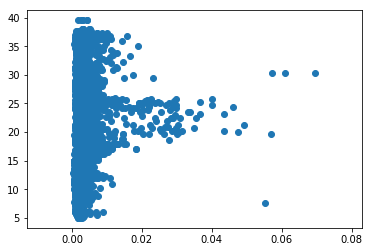

Jitter:DDP


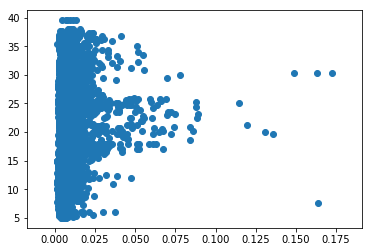

Shimmer


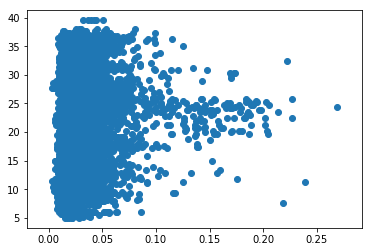

Shimmer(dB)


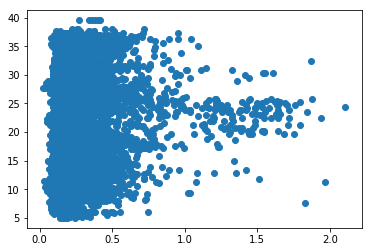

Shimmer:APQ3


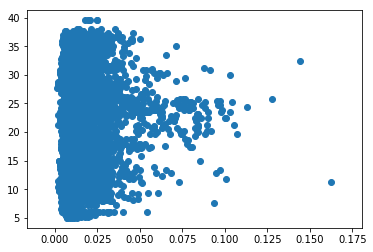

Shimmer:APQ5


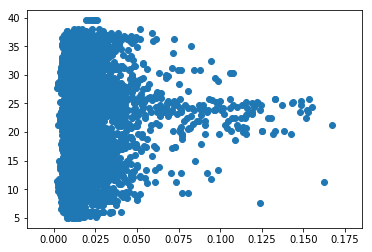

Shimmer:APQ11


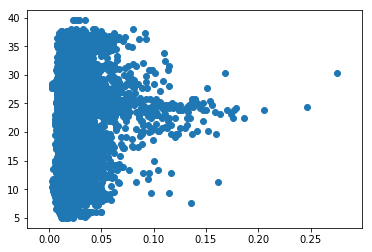

Shimmer:DDA


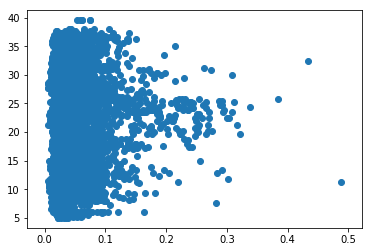

NHR


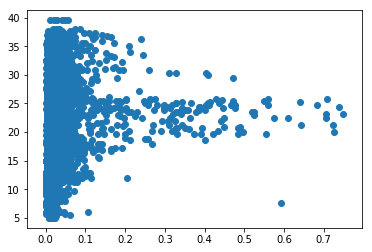

HNR


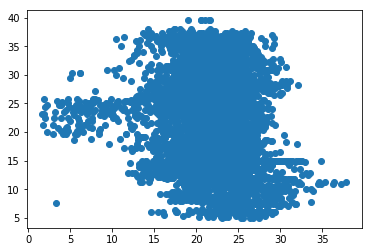

RPDE


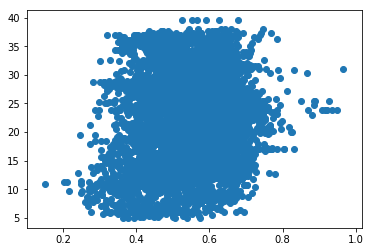

DFA


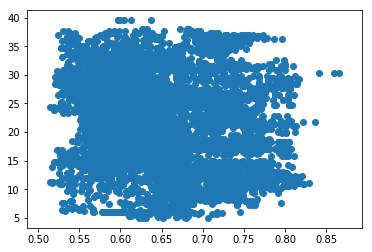

PPE


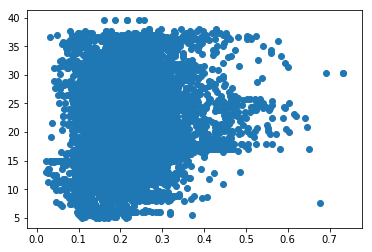

In [30]:
#Plot all of attirbutes  against motor 
ignore= ["subject#","age","sex", "motor_UPDRS"]
for column in x:
    if column in ignore:
        continue
    else:
        print (column)
        t = np.array(x[column])
        plt.scatter(t,y)
        plt.show()

## Linear Regression

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [32]:
#nsamp = 5875
ignoreList= ["subject#","age","sex", "motor_UPDRS","total_UPDRS"]

ns_train = nsamp//4 * 3 
ns_test = nsamp - ns_train

#drop coulmns with in ignore list
for name in ignoreList: 
    x = x.drop(name,1)
    
X_tr = x.values[:ns_train,:]
y_tr = y[:ns_train]
regr.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
regr.coef_

array([  1.21655268e-02,   8.19344037e+02,  -6.66106951e+04,
         1.38850394e+04,  -5.19087857e+02,  -4.66840010e+03,
         2.23517800e+02,  -1.11341867e+01,   5.93719143e+03,
        -1.64612561e+02,   9.13178308e+01,  -2.04758396e+03,
        -2.74756745e+01,  -5.15338012e-01,   5.54783183e-01,
        -2.87226075e+01,   1.74402929e+01])

In [34]:
y_tr_pred = regr.predict(X_tr)
RSS_tr = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.882970
R^2 =            0.117030


From Linear Regression, we obtain a coefficient of determination of 11%


# Predicted vs. Actual


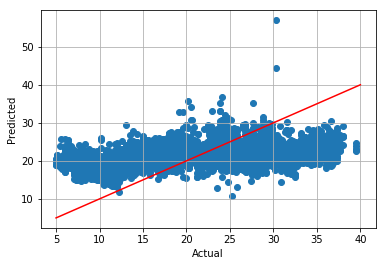

In [35]:
#create a scatter plot of predicted vs. actual
plt.scatter(y_tr,y_tr_pred)
plt.plot([5,40],[5,40],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()

# Neural Network 

In [36]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

In [37]:
import keras.backend as K
K.clear_session()

In [38]:
y = (df['motor_UPDRS'])

x_tr = x.values[:ns_train,:]
y_tr = y[:ns_train]
x_test = x.values[ns_train:,:]
y_test = y[ns_train:]

nin = x_tr.shape[1]  # dimension of input data
nh = 50 #hidden layer with 50 units
nout = 1
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='relu', name='hidden'))
model.add(Dense(nout, activation='linear', name='output'))

Training the Network

In [39]:
from keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['accuracy'])

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 50)                900       
_________________________________________________________________
output (Dense)               (None, 1)                 51        
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________


We provided Keras the number of epochs and the batch size, both discussed in class to run the optimization. In addition, we specified the validation_data so that it can print the accuracy on the test data set as it performs the optimization.

In [41]:
print(x_tr.shape)
print(y_tr.shape)
model.fit(x_tr, y_tr, epochs=50, batch_size=100, validation_data=(x_test,y_test))

(4404, 17)
(4404,)
Train on 4404 samples, validate on 1471 samples
Epoch 1/50
4404/4404 [==============================] - 0s - loss: 255.6749 - acc: 0.0025 - val_loss: 140.2993 - val_acc: 0.0020
Epoch 2/50
4404/4404 [==============================] - 0s - loss: 118.7645 - acc: 0.0041 - val_loss: 99.9502 - val_acc: 0.0027
Epoch 3/50
4404/4404 [==============================] - 0s - loss: 93.6754 - acc: 0.0036 - val_loss: 84.6962 - val_acc: 0.0020
Epoch 4/50
4404/4404 [==============================] - 0s - loss: 83.8830 - acc: 0.0034 - val_loss: 80.0218 - val_acc: 0.0034
Epoch 5/50
4404/4404 [==============================] - 0s - loss: 82.1519 - acc: 0.0018 - val_loss: 79.4746 - val_acc: 0.0034
Epoch 6/50
4404/4404 [==============================] - 0s - loss: 81.0165 - acc: 0.0023 - val_loss: 79.0216 - val_acc: 0.0027
Epoch 7/50
4404/4404 [==============================] - 0s - loss: 80.1527 - acc: 0.0020 - val_loss: 78.1358 - val_acc: 0.0020
Epoch 8/50
4404/4404 [===================

In [42]:
yhat = model.predict(x_test)

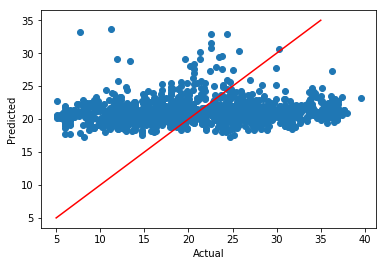

In [43]:
plt.plot(y_test,yhat,'o')
plt.plot([5,35],[5,35],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

For Neural net, our prediction did not reflect well with the actual data 

# Logestical Regression 


In [44]:
#Find ways to classify
#Motor_UPDRS 0-108
#Classify by every  motor UPDRS

classifer = []
for value in df['motor_UPDRS']:
    classifer.append(int(value//10)) # CHANGE THIS NUMBER TO GET PROPER CLASSIFICATION

df["classifer"] = classifer

print(df.classifer.unique())
y = df["classifer"]
y_tr = y[:ns_train]
y_test = y[ns_train:]

[2 1 0 3]


In [45]:
#logreg = linear_model.LogisticRegression(verbose=10, multi_class='multinomial', 
#                                         solver='lbfgs', max_iter=500)
logreg = linear_model.LogisticRegression()
logreg.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
x_test = x.values[ns_train:,:]
yhat = logreg.predict(x_test)
acc = np.mean(yhat == y_test)
print('Accuaracy = {0:f}'.format(acc))  # Check classification

Accuaracy = 0.443916


The measure of accuaracy for logistical regression of the classifer is 42 %

## K-fold training and Cross Validation

In [47]:

from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold, shuffle = True)
prec = []
rec = []
f1 = []
acc = []

for train, test in kf.split(x):            
    # Get training and test data
    Xtr = x.values[train,:]
    ytr = y[train]
    Xts = x.values[test,:]
    yts = y[test]
    
    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat) 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

/home/lv644/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision = 0.1557, SE=0.0752
Recall =    0.2489, SE=0.1420
f1 =        0.1438, SE=0.0799
Accuracy =  0.3883, SE=0.0042


We performed 10-fold cross validation and measured the average precision and accuracy.

# SVM


In [48]:
#creating support vector classifer
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)
#using svc.fit command to fit to training data
svc.fit(x_tr,y_tr)

[LibSVM]

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0073, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=10)

In [49]:
yhat = svc.predict(x_test)
acc = np.mean(yhat == y_test)
print('Accuracy = {0:f}'.format(acc))

Accuaracy = 0.439157


The accuracy of the test samples is 43.98% which is better than previous classifer